In [2]:
import matplotlib.pyplot as plt
import matplotlib as matplt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics
import tables

np.set_printoptions(precision=3, suppress=True)

from matplotlib.gridspec import GridSpec


# Old steal protocol

## V1


In [23]:
IrrGEMM_mig_0_hd5 = pd.HDFStore("./traces/Irr_GEMM_steal-0.prof.h5")



In [24]:
IrrGEMM_mig_0_events = IrrGEMM_mig_0_hd5.events


In [25]:
IrrGEMM_mig_0_events.columns


Index(['size', 'node_id', 'stream_id', 'taskpool_id', 'type', 'begin', 'end',
       'flags', 'id', 'm', 'dst', 'mcp', 'req_recv_time', 'priority', 'dc_key',
       'dc_padding', 'prank', 'select_time', 'mrp_p', 'k', 'g', 'ready_tasks',
       'sec_stage_in_time_start', 'req_init_time', 'knext', 'rp',
       'complete_time', 'class_id', 'launched_tasks', 'n', 'qrank',
       'gpu_tasks', 'tpid', 'second_queue_time', 'stage_out_time_start',
       'nb_first_stage_in_h2d', 'p', 'nb_sec_stage_in_h2d', 'req_mutex',
       'first_waiting_tasks', 'clock_speed', 'complete_time_start', 'cp',
       'device_index', 'tcid', 'data_key', 'nb_sec_stage_in_d2d',
       'first_stage_in_time_end', 'kprev', 'stage_out_time_end', 'tp_nb_tasks',
       'msg_size', 'dc_id', 'first_stage_in_time_start', 'mig_status', 'trc',
       'first_queue_time', 'exec_time_start', 'dc_dataid', 'nb_sec_stage_in',
       'task_count', 'mp', 'sec_stage_in_time_end', 'mrp', 'nb_first_stage_in',
       'exec_stream_index',

In [26]:
IrrGEMM_mig_0_hd5.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [27]:
IrrGEMM_mig_0_hd5.information

exe                                      testing_dgemm_irr_sparse
filename                                    Irr_GEMM_steal-0.prof
id                                                              0
error                                                           0
MEMORY_USAGE               MEMPOOL - Dependencies - 2425480 bytes
                                      ...                        
hostname                       gadi-gpu-v100-0003.gadi.nci.org.au
exe_abspath     /scratch/kx58/jj8451/inter_node_experiments/ir...
nb_nodes                                                        1
worldsize                                                       1
last_error                                                      0
Length: 330, dtype: object

In [28]:

IrrGEMM_mig_0_hd5.close()


Text(0.5, 0, 'Execution time(ns)')

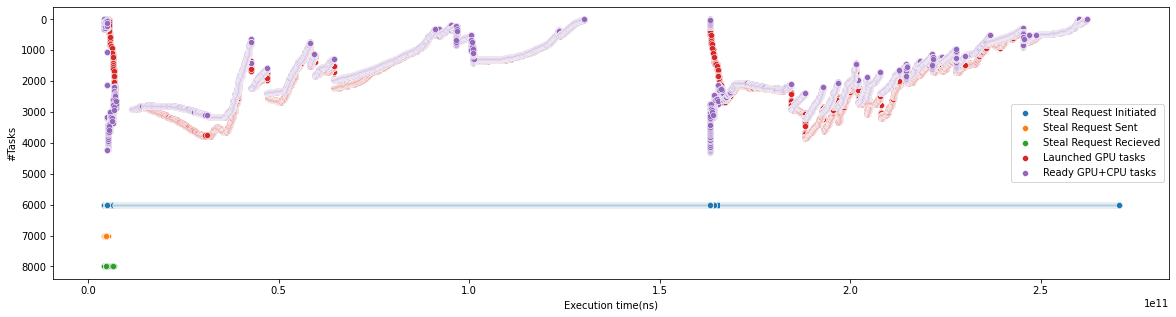

In [16]:

fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])



sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_init_time", y=6000, ax=ax0, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_send_time", y=7000, ax=ax0, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_recv_time", y=8000, ax=ax0, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="complete_time", y="ready_tasks", ax=ax0, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)

Text(0.5, 0, 'Execution time(ns)')

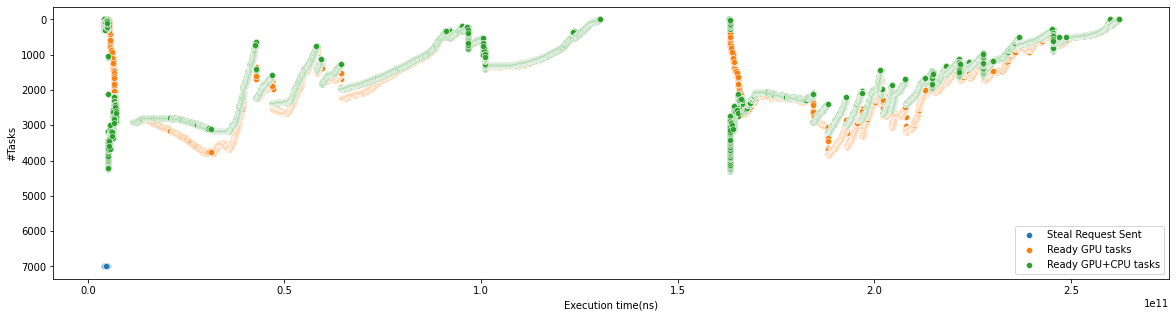

In [30]:

fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])



#sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_init_time", y=6000, ax=ax0, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_send_time", y=7000, ax=ax0, label='Steal Request Sent')

#sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_recv_time", y=8000, ax=ax0, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="complete_time", y="ready_tasks", ax=ax0, label='Ready GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)

In [33]:
def filter_data_frame(df):
   
    df = df.astype(float)
    

    # use only first run
    df = df.loc[ df['taskpool_id'] == 4 ] 

    #Change all timimng values fron ns to ms
    
    df.reset_index(drop=True, inplace=True)
    
    
    return df





In [34]:
IrrGEMM_mig_0_events_refined = filter_data_frame(IrrGEMM_mig_0_events)

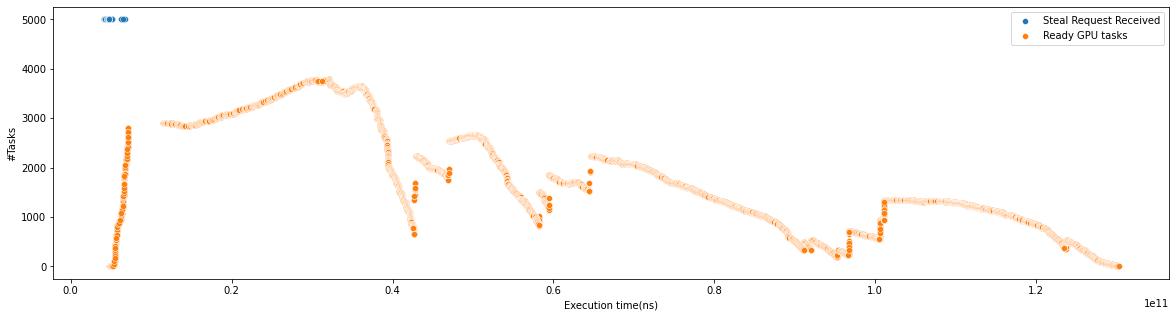

In [39]:

fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])

sns.scatterplot(data=IrrGEMM_mig_0_events_refined, x="req_recv_time", y=5000, ax=ax0, label='Steal Request Received')

sns.scatterplot(data=IrrGEMM_mig_0_events_refined, x="complete_time", y="ready_tasks", ax=ax0, label='Ready GPU tasks')

#sns.scatterplot(data=IrrGEMM_mig_0_events_refined, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
fig.savefig('steal_policy_old.png', dpi=300, bbox_inches='tight')

## V2

In [3]:
IrrGEMM_mig_0_hd5_v2 = pd.HDFStore("./traces/Irr_GEMM_steal-0_v2.prof.h5")



In [4]:
IrrGEMM_mig_0_hd5_v2.keys()


['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [8]:
IrrGEMM_mig_0_hd5_v2.information


exe                                      testing_dgemm_irr_sparse
filename                                    Irr_GEMM_steal-0.prof
id                                                              0
error                                                           0
MEMORY_USAGE               MEMPOOL - Dependencies - 2425480 bytes
                                      ...                        
hostname                       gadi-gpu-v100-0003.gadi.nci.org.au
exe_abspath     /scratch/kx58/jj8451/inter_node_experiments/ir...
nb_nodes                                                        1
worldsize                                                       1
last_error                                                      0
Length: 330, dtype: object

In [5]:
IrrGEMM_mig_0_events_v2 = IrrGEMM_mig_0_hd5_v2.events


In [13]:
IrrGEMM_mig_0_events_v2.columns


Index(['node_id', 'stream_id', 'taskpool_id', 'type', 'begin', 'end', 'flags',
       'id'],
      dtype='object')

In [ ]:
IrrGEMM_mig_0_hd5_v2.close()

# New protocol

In [3]:
IrrGEMM_new_policy_0_hd5 = pd.HDFStore("./traces/Irr_GEMM_new_policy-0.prof.h5")



In [4]:
IrrGEMM_new_policy_0_hd5.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_infos_11',
 '/event_infos_12',
 '/event_infos_13',
 '/event_infos_14',
 '/event_infos_15',
 '/event_infos_16',
 '/event_infos_17',
 '/event_infos_18',
 '/event_infos_20',
 '/event_infos_23',
 '/event_infos_24',
 '/event_infos_25',
 '/event_infos_26',
 '/event_infos_27',
 '/event_infos_28',
 '/event_infos_29',
 '/event_infos_3',
 '/event_infos_4',
 '/event_infos_6',
 '/event_infos_7',
 '/event_infos_8',
 '/event_infos_9',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [5]:
IrrGEMM_mig_0_events_infos_11 = IrrGEMM_new_policy_0_hd5.event_infos_11
IrrGEMM_mig_0_events_infos_11.head()

In [7]:
IrrGEMM_mig_0_events_infos_12 = IrrGEMM_new_policy_0_hd5.event_infos_12
IrrGEMM_mig_0_events_infos_12.head()

,size,data_key,dc_id
4,8000000,7204,140732917829072
6,8000000,7296,140732917829840
8,8000000,9604,140732917829456
14,8000000,5285,140732917829072
16,8000000,5296,140732917829840


In [8]:
IrrGEMM_mig_0_events_infos_13 = IrrGEMM_new_policy_0_hd5.event_infos_13
IrrGEMM_mig_0_events_infos_13.head()

,ready_tasks,complete_time
66162,0.0,4.011386e+09
66170,0.0,4.011716e+09
66175,0.0,4.053514e+09
66180,0.0,4.053534e+09
66185,0.0,4.083962e+09


In [9]:
IrrGEMM_mig_0_events_infos_14 = IrrGEMM_new_policy_0_hd5.event_infos_14
IrrGEMM_mig_0_events_infos_14.head()

,tp_nb_tasks,task_progress
66163,22.0,4.011388e+09
66171,77.0,4.011717e+09
66176,143.0,4.053515e+09
66181,142.0,4.053534e+09
66186,144.0,4.083962e+09


In [10]:
IrrGEMM_mig_0_events_infos_15 = IrrGEMM_new_policy_0_hd5.event_infos_15
IrrGEMM_mig_0_events_infos_15.head()

,gpu_tasks,req_recv_time
66188,0.0,4.083964e+09
66255,0.0,4.218919e+09
66261,0.0,4.218942e+09
66282,0.0,4.316763e+09
66294,0.0,4.350294e+09


In [11]:
IrrGEMM_mig_0_events_infos_16 = IrrGEMM_new_policy_0_hd5.event_infos_16
IrrGEMM_mig_0_events_infos_16.head()

,launched_tasks,req_send_time
66155,0.0,4.009507e+09
66254,0.0,4.218915e+09
66293,0.0,4.350290e+09
66310,0.0,4.418073e+09
66391,0.0,4.448637e+09


In [12]:
IrrGEMM_mig_0_events_infos_17 = IrrGEMM_new_policy_0_hd5.event_infos_17
IrrGEMM_mig_0_events_infos_17.head()

,req_mutex,req_init_time
66154,0.0,4.009503e+09
66156,1.0,4.010687e+09
66157,1.0,4.010812e+09
66158,1.0,4.010928e+09
66159,1.0,4.011054e+09


In [13]:
IrrGEMM_mig_0_events_infos_18 = IrrGEMM_new_policy_0_hd5.event_infos_18
IrrGEMM_mig_0_events_infos_18.head()

,src,dst,tid,tpid,tcid,msg_size
18436957,0,1,7600,4,0,112


In [14]:
IrrGEMM_mig_0_events_infos_20 = IrrGEMM_new_policy_0_hd5.event_infos_20
IrrGEMM_mig_0_events_infos_20.head()

,src,dst,tid,tpid,tcid,msg_size
30405884,0,1,7600,4,0,8000000
30405885,0,1,3600,4,0,8000000
30405886,0,1,8400,4,0,8000000
30405887,0,1,5600,4,0,8000000
30405888,0,1,1601,4,0,8000000


In [15]:
IrrGEMM_mig_0_events_infos_23 = IrrGEMM_new_policy_0_hd5.event_infos_23
IrrGEMM_mig_0_events_infos_23.head()

,dc_key,priority,dc_dataid,tcid,trc,m,n
66160,140732917829840,0,220,0,0,2,20
66168,140732917829840,0,500,0,0,5,0
66173,140732917829840,0,448,0,0,4,48
66178,140732917829840,0,1168,0,0,11,68
66183,140732917829840,0,1164,0,0,11,64


In [16]:
IrrGEMM_mig_0_events_infos_24 = IrrGEMM_new_policy_0_hd5.event_infos_24
IrrGEMM_mig_0_events_infos_24.head()

,dc_key,priority,dc_dataid,tcid,trc,m,n,k,prank,qrank,g,cp,rp,kprev,knext
9,6.559392e+06,0.0,0.0,5.0,-1.0,72.0,4.0,96.0,0.0,0.0,0.0,0.0,0.0,-1.0,3.0
19,6.559392e+06,0.0,0.0,5.0,-4.0,52.0,85.0,96.0,0.0,0.0,0.0,0.0,0.0,-1.0,13.0
23,1.407329e+14,1000.0,9728.0,0.0,-4.0,84.0,63.0,37.0,0.0,1.0,0.0,0.0,0.0,-1.0,30.0
27,1.407329e+14,1000.0,9944.0,0.0,-4.0,50.0,63.0,37.0,0.0,1.0,0.0,0.0,0.0,-1.0,7.0
34,1.407329e+14,1000.0,9824.0,0.0,-4.0,50.0,91.0,37.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0


In [17]:
IrrGEMM_mig_0_events_infos_25 = IrrGEMM_new_policy_0_hd5.event_infos_25
IrrGEMM_mig_0_events_infos_25.head()

,dc_key,priority,dc_dataid,tcid,trc,prank,qrank,g,mcp,cp,mrp,rp
2613918,6559392,0,0,4,0,0,0,0,1,0,3,0
8637161,6559392,0,0,4,0,0,0,2,1,0,3,0
13344953,6559392,0,0,4,0,0,0,1,1,0,3,0
14965352,6559392,0,0,4,0,0,0,1,1,0,3,0
17827209,6559392,0,0,4,0,0,0,3,1,0,3,0


In [18]:
IrrGEMM_mig_0_events_infos_26 = IrrGEMM_new_policy_0_hd5.event_infos_26
IrrGEMM_mig_0_events_infos_26.head()

,dc_key,priority,dc_dataid,tcid,trc,prank,qrank,g,mp,cp,mrp_p
9569773,6559392,0,0,3,0,0,0,2,1,0,-1
11497715,6559392,0,0,3,0,0,0,0,1,0,-1
13344948,6559392,0,0,3,0,0,0,1,1,0,-1
15596836,6559392,0,0,3,0,0,0,1,1,0,-1
18126473,6559392,0,0,3,0,0,0,0,1,0,-1


In [19]:
IrrGEMM_mig_0_events_infos_27 = IrrGEMM_new_policy_0_hd5.event_infos_27
IrrGEMM_mig_0_events_infos_27.head()

,dc_key,priority,dc_dataid,tcid,trc,m,n,k,prank,qrank,g,p
67319,6559392,0,0,2,0,99,3,9,0,0,2,0
67324,6559392,0,0,2,0,97,38,20,0,0,0,0
67329,6559392,0,0,2,0,88,2,8,0,0,2,0
67334,6559392,0,0,2,0,83,65,96,0,0,2,0
67339,6559392,0,0,2,0,75,51,16,0,0,2,0


In [20]:
IrrGEMM_mig_0_events_infos_28 = IrrGEMM_new_policy_0_hd5.event_infos_28
IrrGEMM_mig_0_events_infos_28.head()

,dc_key,priority,dc_dataid,tcid,trc,prank,qrank,n,k,g,p
67439,6559392,0,0,1,0,0,0,65,94,2,0
67444,6559392,0,0,1,0,0,0,3,66,2,0
67449,6559392,0,0,1,0,0,0,2,49,2,0
67454,6559392,0,0,1,0,0,0,2,34,2,0
67459,6559392,0,0,1,0,0,0,2,13,2,0


In [21]:
IrrGEMM_mig_0_events_infos_29 = IrrGEMM_new_policy_0_hd5.event_infos_29
IrrGEMM_mig_0_events_infos_29.head()

,dc_key,priority,dc_dataid,tcid,trc,m,k
67109,140732917829840,1000,272,0,0,2,72
67114,140732917829840,1000,1544,0,0,15,44
67119,140732917829840,1000,2392,0,0,23,92
67124,140732917829840,1000,1248,0,0,12,48
67129,140732917829840,1000,1864,0,0,18,64


In [23]:
IrrGEMM_mig_0_events_infos_3 = IrrGEMM_new_policy_0_hd5.event_infos_3
IrrGEMM_mig_0_events_infos_3.head()

,tcid
66161,0
66169,0
66174,0
66179,0
66184,0


In [24]:
IrrGEMM_mig_0_events_infos_4 = IrrGEMM_new_policy_0_hd5.event_infos_4
IrrGEMM_mig_0_events_infos_4.head()

""
30404853
30404854
30404855
30404856
30404857


In [25]:
IrrGEMM_mig_0_events_infos_6 = IrrGEMM_new_policy_0_hd5.event_infos_6
IrrGEMM_mig_0_events_infos_6.head()

,first_queue_time,select_time,second_queue_time,exec_time_start,exec_time_end,first_stage_in_time_start,sec_stage_in_time_start,first_stage_in_time_end,sec_stage_in_time_end,stage_out_time_start,...,nb_first_stage_in,nb_sec_stage_in,nb_first_stage_in_d2d,nb_first_stage_in_h2d,nb_sec_stage_in_d2d,nb_sec_stage_in_h2d,clock_speed,task_type,class_id,exec_stream_index
67525,6.213458e+09,0.0,0.0,6.339362e+09,1.529975e+10,6.215220e+09,0.0,6.338678e+09,0.0,1.530666e+10,...,3.0,0.0,0.0,3.0,0.0,0.0,1290.0,0.0,5.0,2.0
67526,6.219891e+09,0.0,0.0,1.530675e+10,1.530758e+10,1.529950e+10,0.0,1.530644e+10,0.0,1.530764e+10,...,2.0,0.0,0.0,2.0,0.0,0.0,1290.0,0.0,5.0,2.0
72887,1.880270e+10,0.0,0.0,1.880283e+10,1.880361e+10,1.880274e+10,0.0,1.880277e+10,0.0,1.880403e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,0.0,5.0,2.0
72888,1.880275e+10,0.0,0.0,1.880335e+10,1.880378e+10,1.880325e+10,0.0,1.880327e+10,0.0,1.888170e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,0.0,5.0,2.0
72889,1.880275e+10,0.0,0.0,1.880367e+10,1.880434e+10,1.880328e+10,0.0,1.880330e+10,0.0,1.890639e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,1290.0,0.0,5.0,3.0


In [26]:
IrrGEMM_mig_0_events_infos_7 = IrrGEMM_new_policy_0_hd5.event_infos_7
IrrGEMM_mig_0_events_infos_7.head()

""
67524
72886
97606
106021
109644


In [27]:
IrrGEMM_mig_0_events_infos_8 = IrrGEMM_new_policy_0_hd5.event_infos_8
IrrGEMM_mig_0_events_infos_8.head()

,dc_key,dc_dataid,dc_padding
3,140732917829072,7204,5374
5,140732917829840,7296,5374
7,140732917829456,9604,5374
13,140732917829072,5285,5374
15,140732917829840,5296,5374


In [28]:
IrrGEMM_mig_0_events_infos_9 = IrrGEMM_new_policy_0_hd5.event_infos_9
IrrGEMM_mig_0_events_infos_9.head()

,dc_key,dc_dataid,dc_padding
19403,140732917829072,7206,0
35461,140732917829072,3231,0
36169,140732917829072,6651,0


In [29]:
IrrGEMM_new_policy_0_hd5.close()

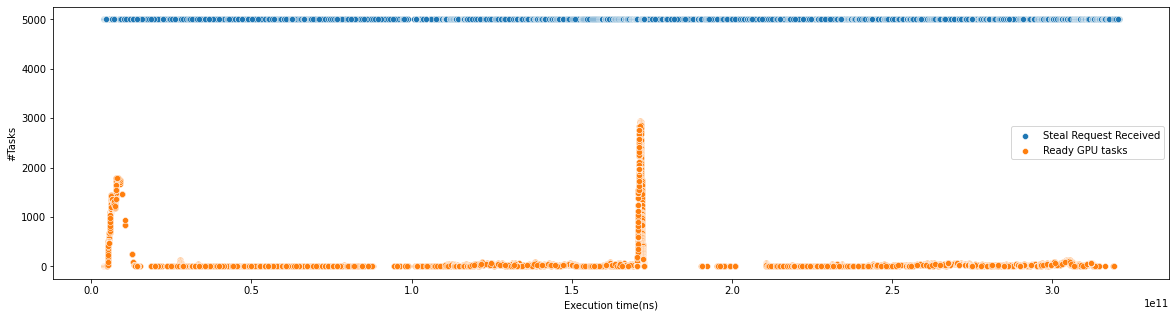

In [30]:

fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])

sns.scatterplot(data=IrrGEMM_mig_0_events_infos_15, x="req_recv_time", y=5000, ax=ax0, label='Steal Request Received')

sns.scatterplot(data=IrrGEMM_mig_0_events_infos_13, x="complete_time", y="ready_tasks", ax=ax0, label='Ready GPU tasks')

#sns.scatterplot(data=IrrGEMM_mig_0_events_refined, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
fig.savefig('steal_policy_new.png', dpi=300, bbox_inches='tight')